In [1]:
# Import the required experiment modules
import mnist
import dsprites
import ecg5000
import cifar10
import imagenet
import agnews, cora
# Import any additional modules
from omegaconf import OmegaConf
import logging
import sys

In [2]:
# Configure logging
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

**IMPORTANT**: 
1) For loading the pretrained models you must place the 'results' folder with the data generated by the respective experiment(s) in the same folder (i.e., the experiments folder) as this jupyter notebook is in. 

2) This jupyter notebook must be in the same folder with the experiment module files (e.g., mnist.py, dsprites.py etc.) that all reside in the folder experiments.

## Reproducbility Study: Original Experiments

### Results 1: Label-Free Feature Importance (Evaluating Claim 1)

#### MNIST

In [3]:
# Define the Parameters for this experiment
random_seed = 1       # The seed for the beginning of the experiment
n_epochs = 100        # number of epochs to train
load_models = True        # Load pretrained models from files? (True or False)
load_metrics = False      # Change it to True if you ONLY want to calculate the final box figure from the existing saved metrics

In [5]:
# Takes around 15 to 30 mins (on a pretrained model)
mnist.consistency_feature_importance(
    random_seed = random_seed,
    n_epochs = n_epochs,
    load_models = load_models
) 

Load metrics bool True
Load metrics bool after True
INFO:root:Loading the metrics from: /Users/madhurapawar/Documents/FACT_1_Feb/FACT-AI-group-9/experiments/results/mnist/consistency_features/metrics.csv


#### ECG5000

In [7]:
# Define the Parameters for this experiment
random_seed = 1       # The seed for the beginning of the experiment
n_epochs = 100        # number of epochs to train
load_models = True        # Load pretrained models from files? (True or False)
load_metrics = True     # Change it to True if you ONLY want to calculate the final box figure from the existing saved metrics

In [10]:
# Takes around 15 to 30 mins (on a pretrained model)
ecg5000.consistency_feature_importance(
    random_seed = random_seed,
    n_epochs = n_epochs,
    load_models = load_models,
    load_metrics = load_metrics
) 

/Users/madhurapawar/Documents/FACT_1_Feb/FACT-AI-group-9/src/lfxai/utils/datasets.py:291: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_df = total_df.append(pd.DataFrame(data))


INFO:root:Loading the metrics from: /Users/madhurapawar/Documents/FACT_1_Feb/FACT-AI-group-9/experiments/results/ecg5000/consistency_features/metrics.csv


/Users/madhurapawar/Documents/FACT_1_Feb/FACT-AI-group-9/src/lfxai/utils/datasets.py:291: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_df = total_df.append(pd.DataFrame(data))


#### CIFAR10

In [7]:
# Define the Parameters for this experiment
simclr_yaml_file = "simclr_config_cf.yaml"      # Change model configurations from this yaml file

# Added below params in above yaml file
# load_models=True        # Load pretrained models from files? (True or False)
# load_metrics=True       # Change it to True if you ONLY want to calculate the final box figure from the existing saved metrics

In [8]:
# Takes around 4 hours (on a pretrained model). Due to time limitations and we had other experiments running on LISA, 
# could not re run this experiment to create a metrics file. Attaching the image of trends as generated on LISA earlier
args = OmegaConf.load(simclr_yaml_file)
cifar10.consistency_feature_importance(args)

/Users/madhurapawar/opt/anaconda3/envs/fact_9/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/madhurapawar/opt/anaconda3/envs/fact_9/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


INFO:root:Base model: resnet18 - feature dim: 512 - projection dim 128
INFO:root:Computing feature importance with Gradient Shap


KeyboardInterrupt: 

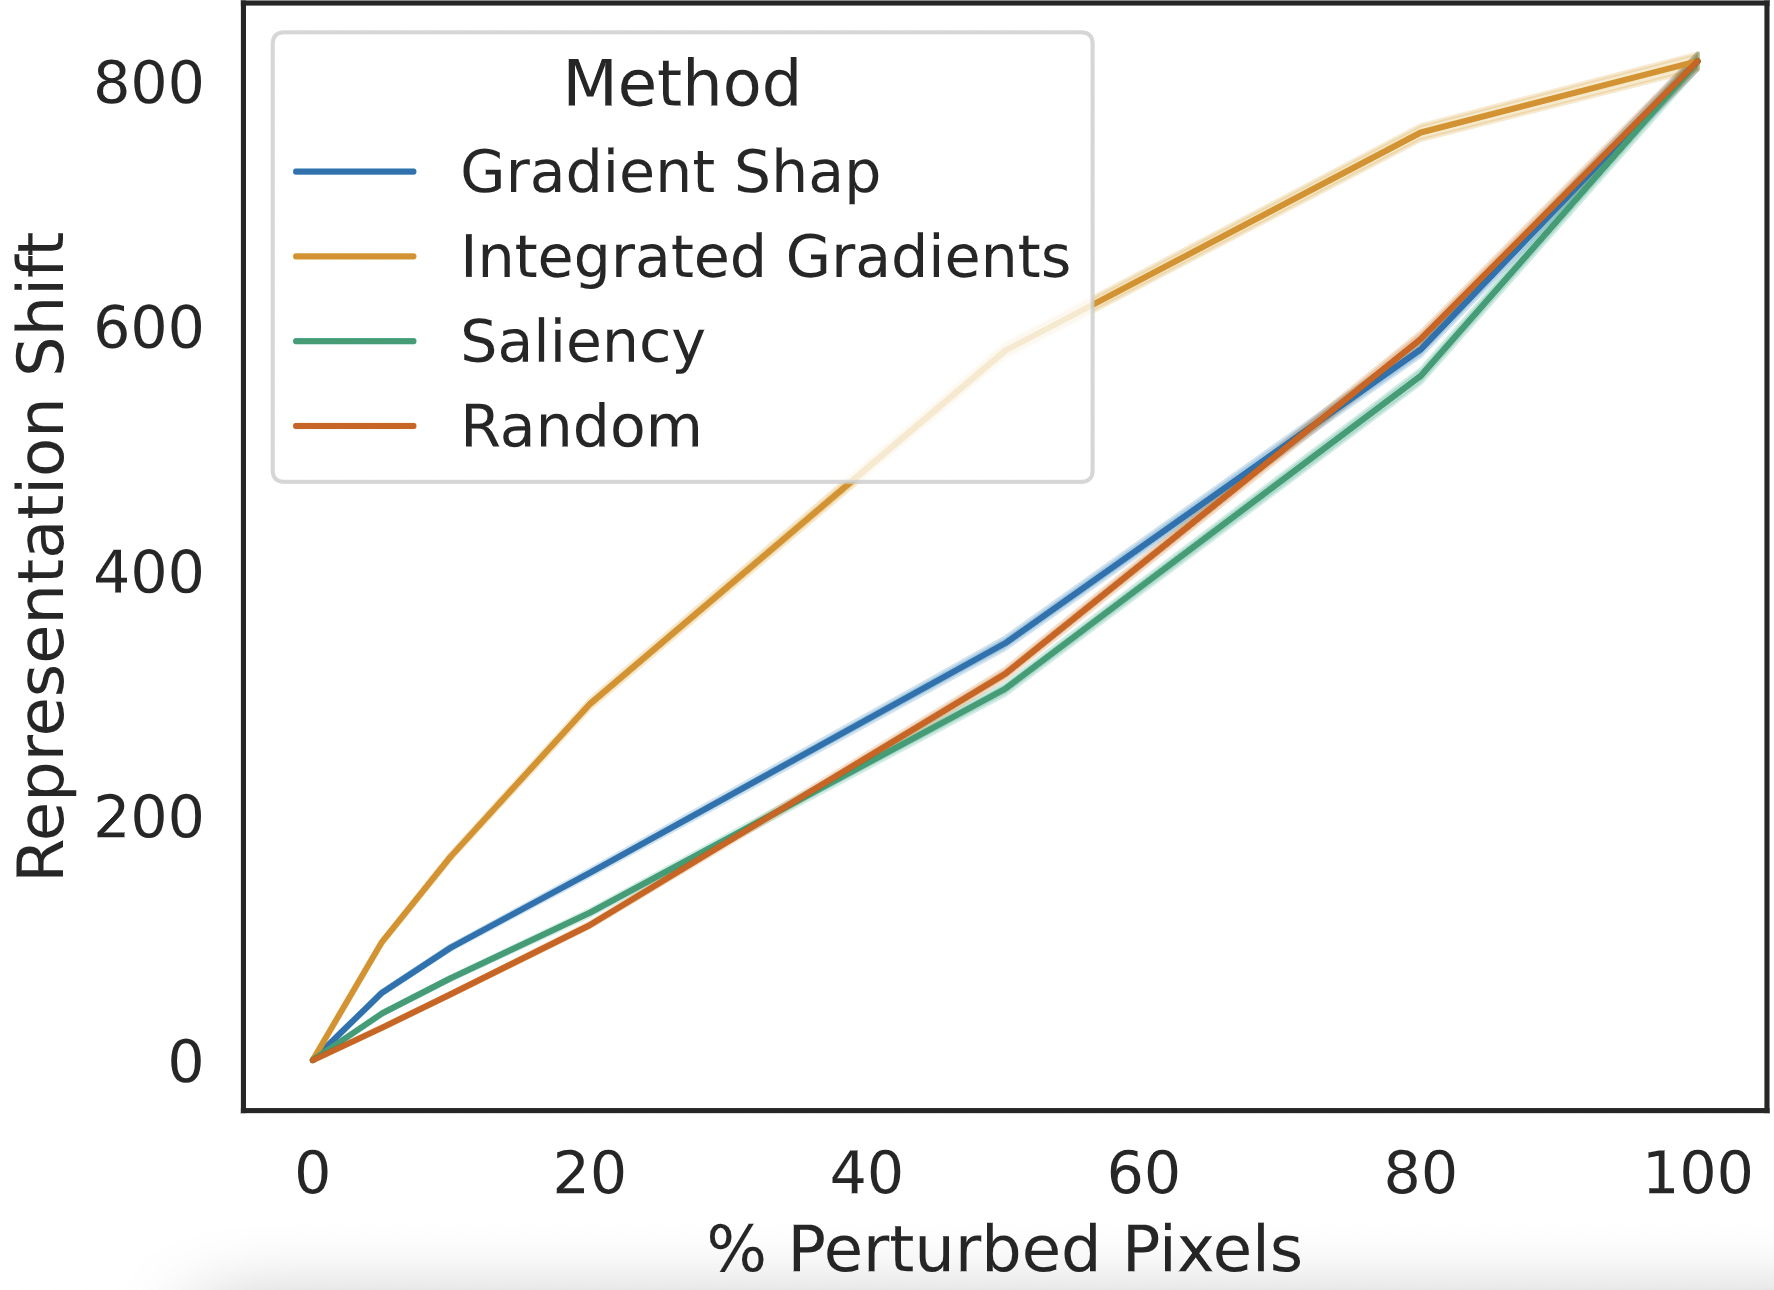

### Results 2: Label-Free Example Importance (Evaluating Claim 2)

For this method, the execution time is quite longer. Hence, we present our obtained metrics in results folder which could be visualized be setting ```load_metrics=True```. To run the attribution methods from scrath set ```load_metrics=False```. The subtrain size used for original experiments is 1000 which could potentially take a lot of time to execute. To execute it faster, we suggest decreasing the subtrain size to 100-200.

#### MNIST

In [ ]:
# Define the Parameters for this experiment
random_seed = 1       # The seed for the beginning of the experiment
dim_latent = 4        # Latent dimension size for autoencoder architecture
n_epochs = 100        # number of epochs to train
subtrain_size = 1000  # subset size of training data for attribution methods
load_models = True        # Load pretrained models from files? (True or False)
load_metrics = True       # Change it to True if you ONLY want to calculate the final box figure from the existing saved metrics

In [ ]:
mnist.consistency_examples(
    batch_size=batch_size, 
    random_seed=random_seed,
    dim_latent=dim_latent,
    n_epochs=n_epochs,
    subtrain_size=subtrain_size,
    load_models=load_models,
    load_metrics=load_metrics,
    )

INFO:root:Loading the metrics from: /home/avik/Labs/FACT/original1/FACT-AI-group-9/experiments/results/mnist/consistency_examples/metrics.csv


#### ECG5000

In [ ]:
# Define the Parameters for this experiment
batch_size=20      # Batch Size that can improve the speed if appropriate hardware is available
random_seed=1       # The seed for the beginning of the experiment
dim_latent=64        # Latent dimension size for autoencoder architecture
n_epochs=150        # number of epochs to train
subtrain_size=1000  # subset size of training data for attribution methods
load_models=True        # Load pretrained models from files? (True or False)
load_metrics=True       # Change it to True if you ONLY want to calculate the final box figure from the existing saved metrics

In [ ]:
ecg5000.consistency_example_importance(
    batch_size=batch_size, 
    random_seed=random_seed,
    dim_latent=dim_latent,
    n_epochs=n_epochs,
    subtrain_size=subtrain_size,
    load_models=load_models,
    load_metrics=load_metrics,
    )

INFO:root:Downloading the ECG5000 Dataset.
INFO:root:Finished Downloading.
INFO:root:Loading the metrics from: /home/avik/Labs/FACT/original1/FACT-AI-group-9/experiments/results/ecg5000/consistency_examples/metrics.csv


/home/avik/Labs/FACT/original1/FACT-AI-group-9/src/lfxai/utils/datasets.py:291: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_df = total_df.append(pd.DataFrame(data))


#### CIFAR10

In [ ]:
# Define the Parameters for this experiment
simclr_yaml_file = "simclr_config_ce.yaml"      # Change model configurations from this yaml file

# Added below params in above yaml file
# load_models=True        # Load pretrained models from files? (True or False)
# load_metrics=True       # Change it to True if you ONLY want to calculate the final box figure from the existing saved metrics

INFO:root:Loading the metrics from: /home/avik/Labs/FACT/original1/FACT-AI-group-9/experiments/results/cifar10/consistency_examples/resnet18/metrics.csv


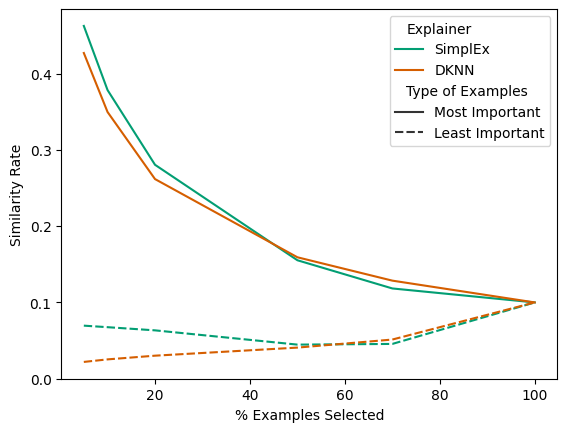

In [ ]:
args = OmegaConf.load(simclr_yaml_file)
cifar10.consistency_example_importance(args)

### Results 3: Challenging our Assumptions with Disentangled VAEs (Evaluating Claim 3)

#### MNIST

In [16]:
# Define the Parameters for this experiment
n_runs=1         # How many times you want each epxeriment to be performed? 
batch_size=300      # Batch Size that can improve the speed if appropriate hardware is available
random_seed=1       # The seed for the beginning of the experiment
attr_method_name='GradientShap'     # Approach to use to compute the Feature Importances ('GradientShap' or 'IntegratedGradients')
load_models=True        # Load pretrained models from files? (True or False)
load_metrics=False       # Cchange it to True if you ONLY want to calculate the final box figure from the existing saved metrics
override_metrics=False   # If there are existing metrics from previous experiments, they will be used with the new results generated.
                        # Make it False to add the new metrics to the previous metrics and show the overall data
                        # Make it True to add the new metrics to a new empty file and thus the box-plots will depend only on the new metrics

INFO:root:Working on Beta-vae_beta1_run1
INFO:root:Pretrained model loaded from: c:\Users\valen\OneDrive - UvA\Repositories\FACT-AI-2023\test\Label-Free-XAI\experiments\results\mnist\vae\lat_dims_3\GradientShap\no_attr_prior\Beta-vae_beta1_run1.pt
INFO:root:Model Beta-vae_beta1_run1 	 Pearson Correlation 0.27	Spearman Correlation 0.98	Cosine 0.64	Entropy 0.71	Active Neurons 1.3


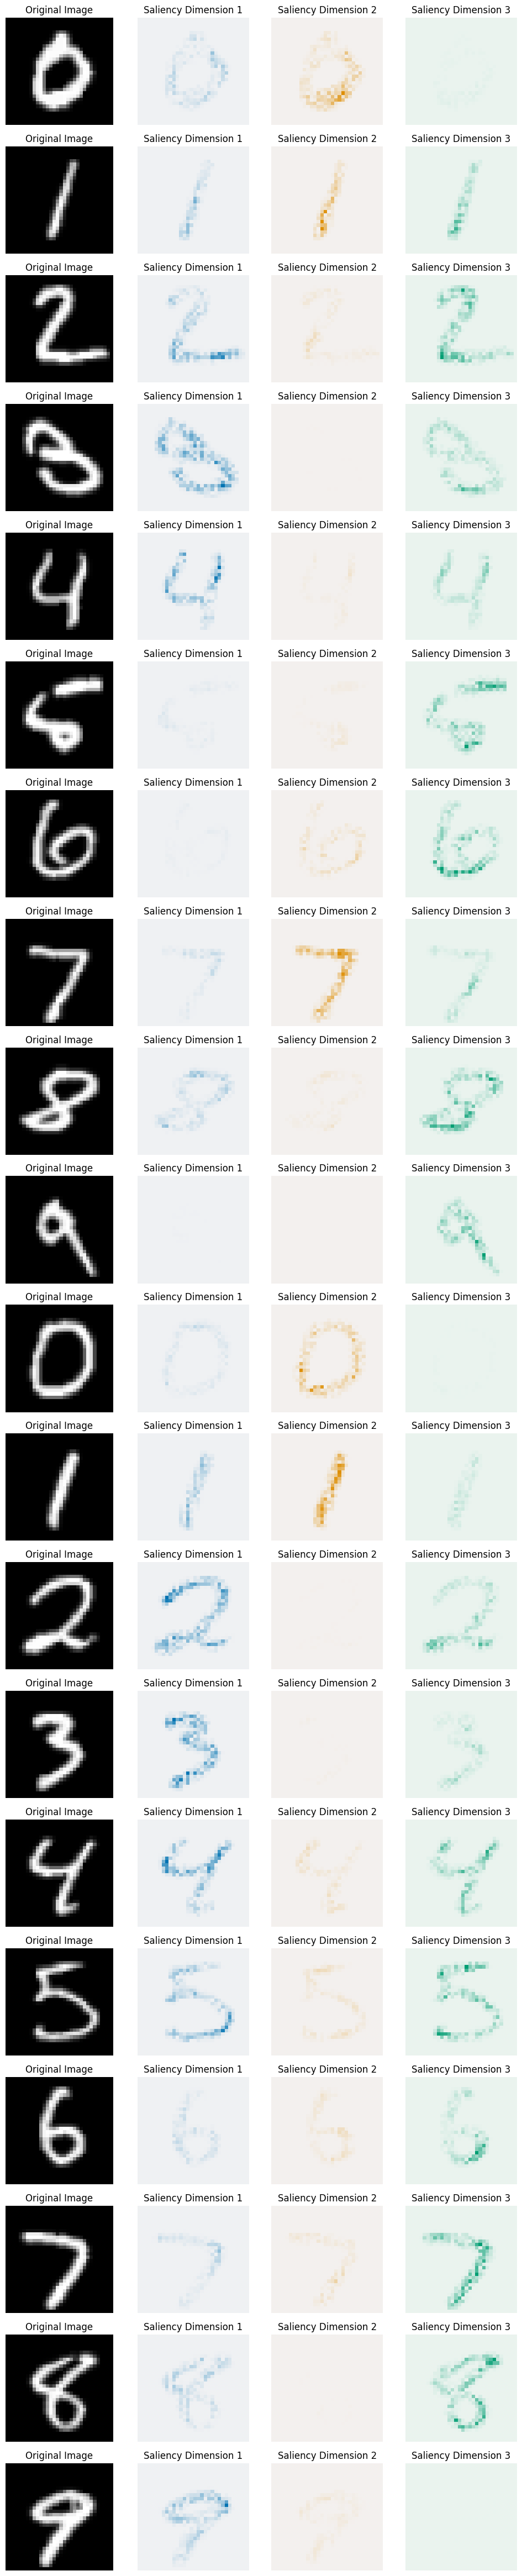

INFO:root:Working on TC-vae_beta1_run1
INFO:root:Pretrained model loaded from: c:\Users\valen\OneDrive - UvA\Repositories\FACT-AI-2023\test\Label-Free-XAI\experiments\results\mnist\vae\lat_dims_3\GradientShap\no_attr_prior\TC-vae_beta1_run1.pt
INFO:root:Model TC-vae_beta1_run1 	 Pearson Correlation 0.22	Spearman Correlation 0.98	Cosine 0.58	Entropy 0.7	Active Neurons 1.3


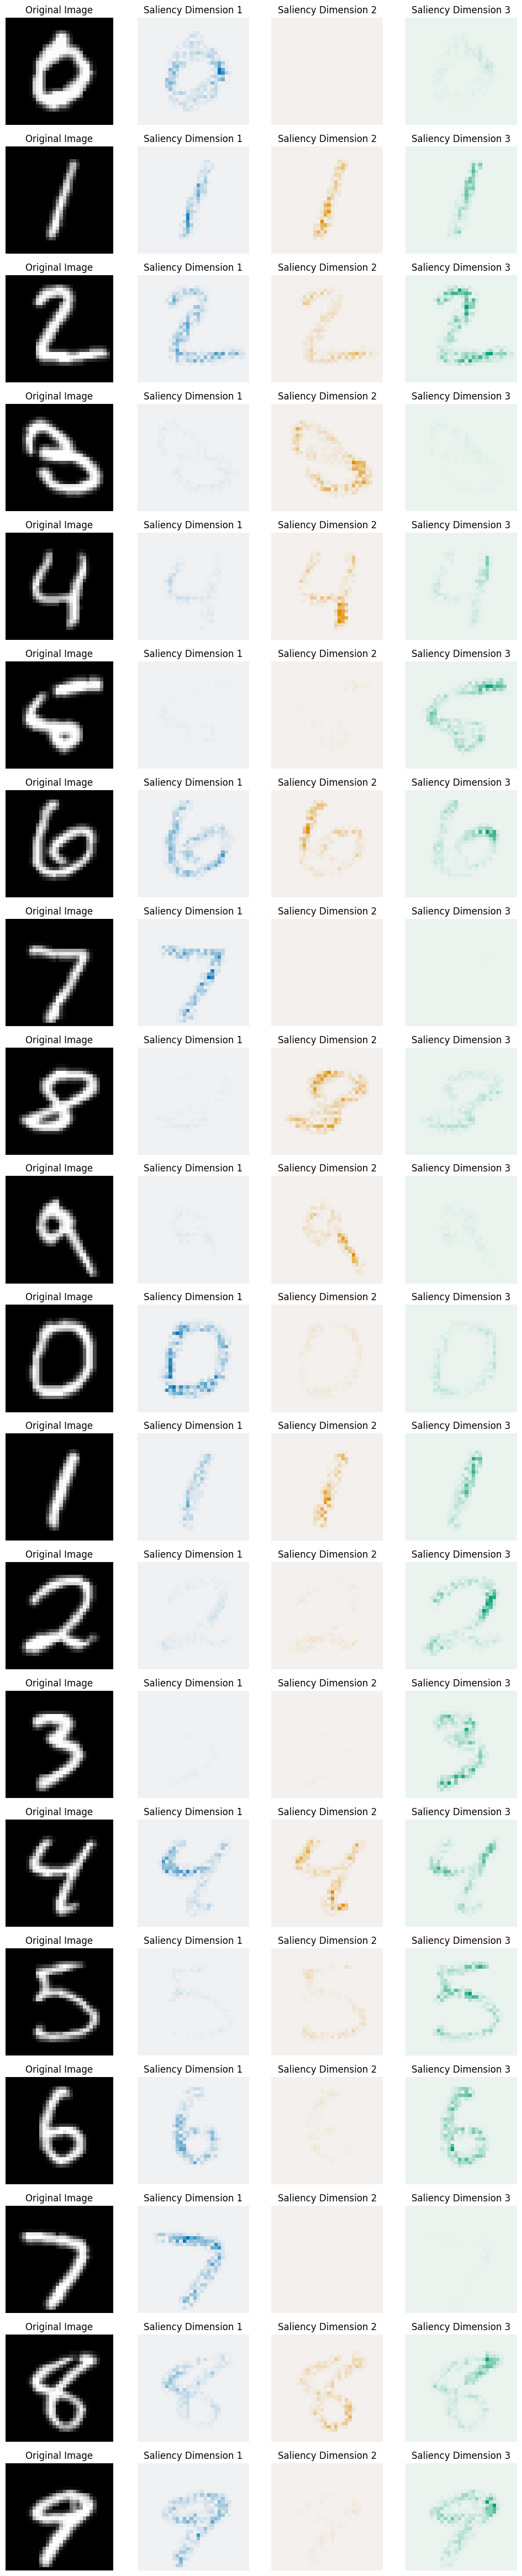

INFO:root:Working on Beta-vae_beta5_run1
INFO:root:Pretrained model loaded from: c:\Users\valen\OneDrive - UvA\Repositories\FACT-AI-2023\test\Label-Free-XAI\experiments\results\mnist\vae\lat_dims_3\GradientShap\no_attr_prior\Beta-vae_beta5_run1.pt
INFO:root:Model Beta-vae_beta5_run1 	 Pearson Correlation 0.28	Spearman Correlation 0.98	Cosine 0.65	Entropy 0.71	Active Neurons 1.3


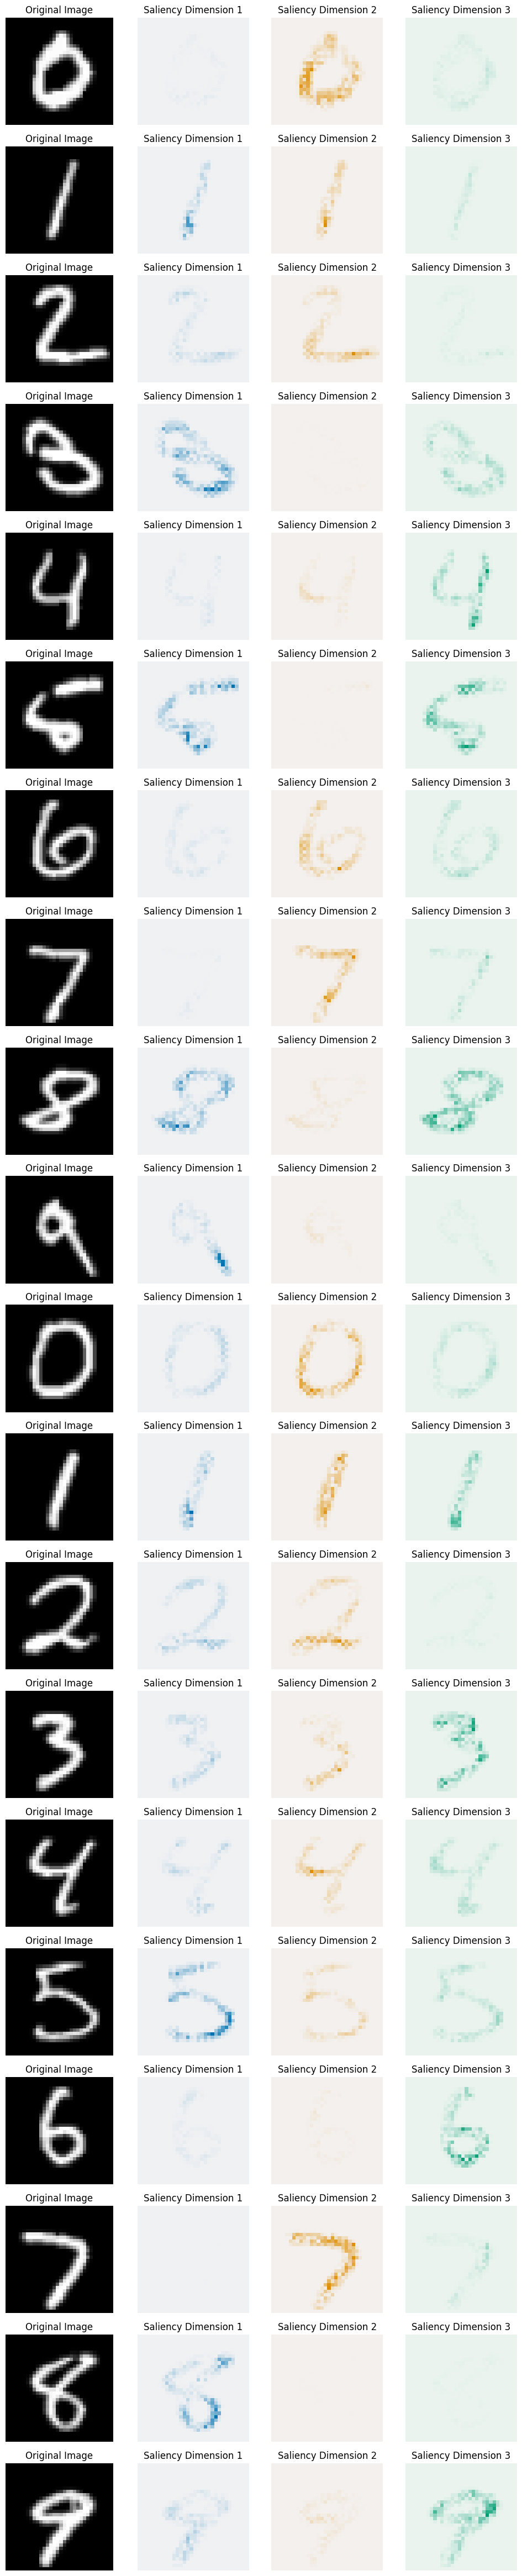

INFO:root:Working on TC-vae_beta5_run1
INFO:root:Pretrained model loaded from: c:\Users\valen\OneDrive - UvA\Repositories\FACT-AI-2023\test\Label-Free-XAI\experiments\results\mnist\vae\lat_dims_3\GradientShap\no_attr_prior\TC-vae_beta5_run1.pt
INFO:root:Model TC-vae_beta5_run1 	 Pearson Correlation 0.19	Spearman Correlation 0.98	Cosine 0.64	Entropy 0.44	Active Neurons 1.2


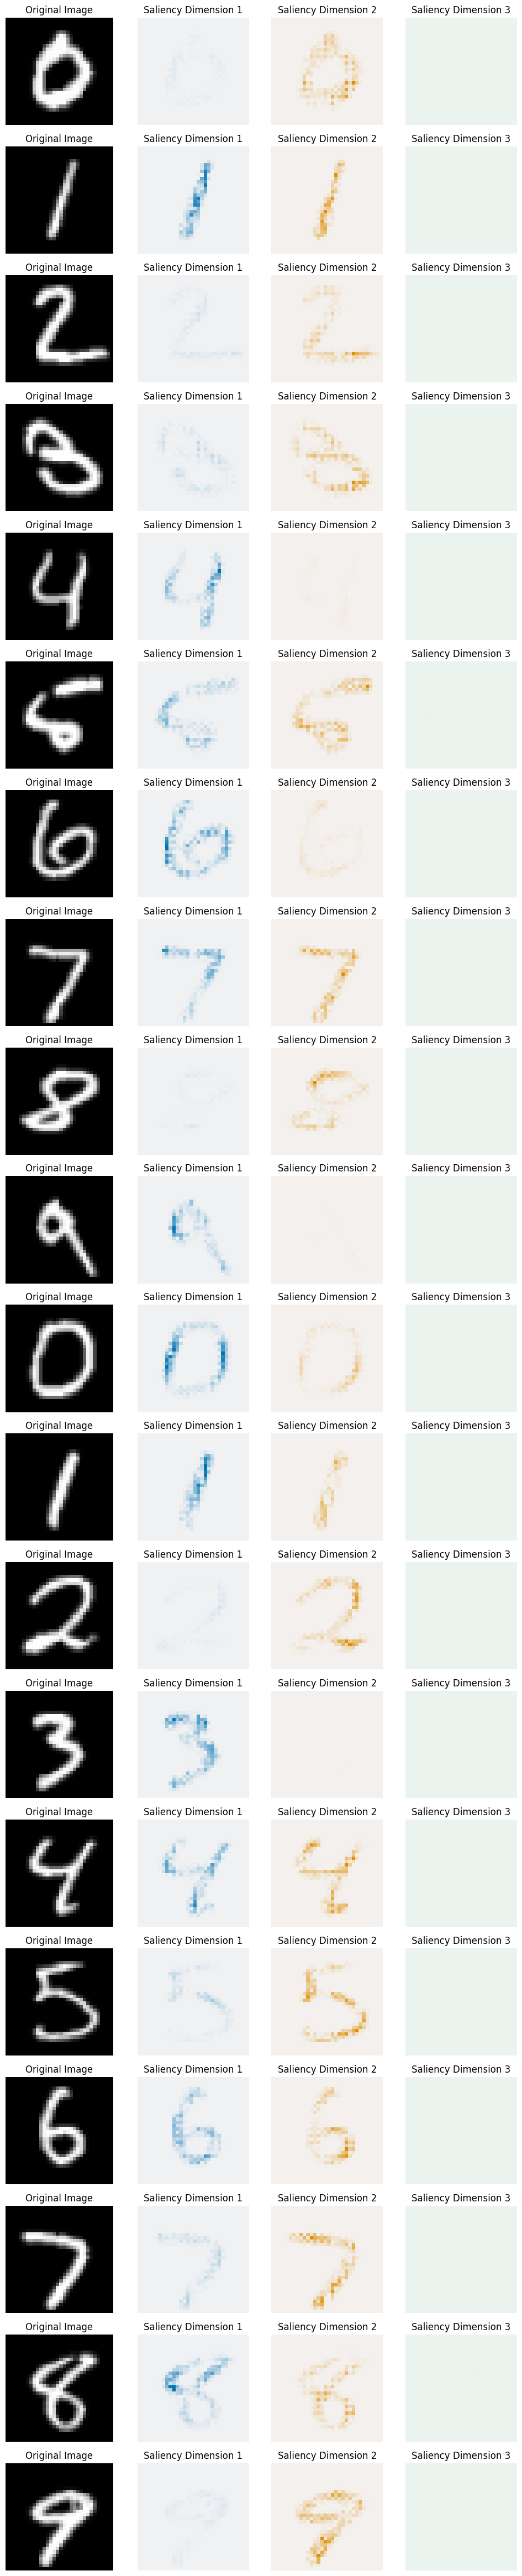

INFO:root:Working on Beta-vae_beta10_run1
INFO:root:Pretrained model loaded from: c:\Users\valen\OneDrive - UvA\Repositories\FACT-AI-2023\test\Label-Free-XAI\experiments\results\mnist\vae\lat_dims_3\GradientShap\no_attr_prior\Beta-vae_beta10_run1.pt
INFO:root:Model Beta-vae_beta10_run1 	 Pearson Correlation 0.21	Spearman Correlation 0.98	Cosine 0.67	Entropy 0.5	Active Neurons 1.2


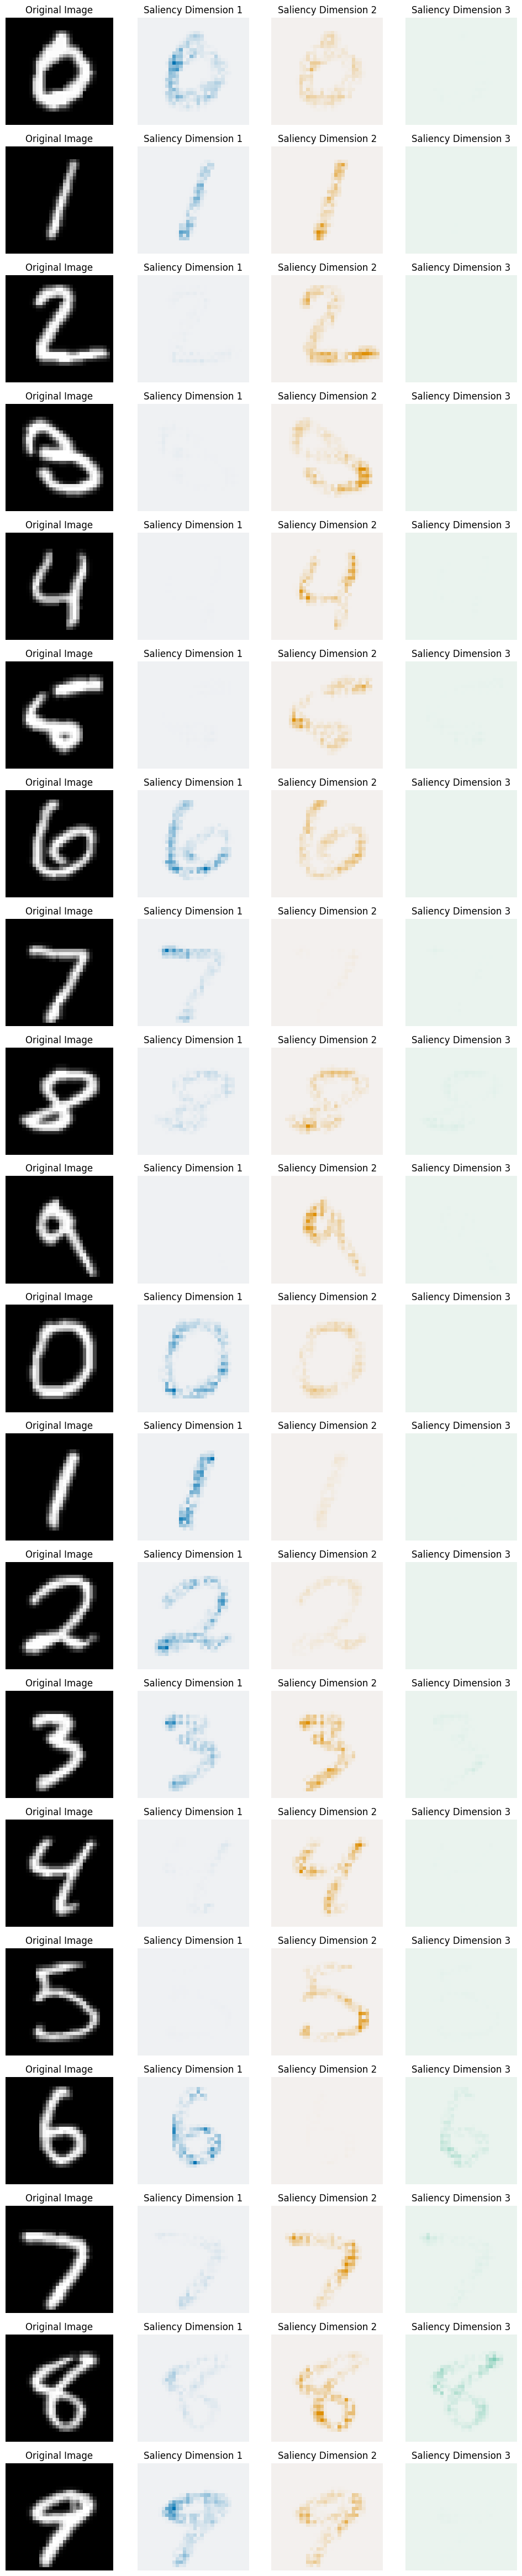

INFO:root:Working on TC-vae_beta10_run1
INFO:root:Pretrained model loaded from: c:\Users\valen\OneDrive - UvA\Repositories\FACT-AI-2023\test\Label-Free-XAI\experiments\results\mnist\vae\lat_dims_3\GradientShap\no_attr_prior\TC-vae_beta10_run1.pt
INFO:root:Model TC-vae_beta10_run1 	 Pearson Correlation 0.32	Spearman Correlation 0.98	Cosine 0.66	Entropy 0.41	Active Neurons 1.2


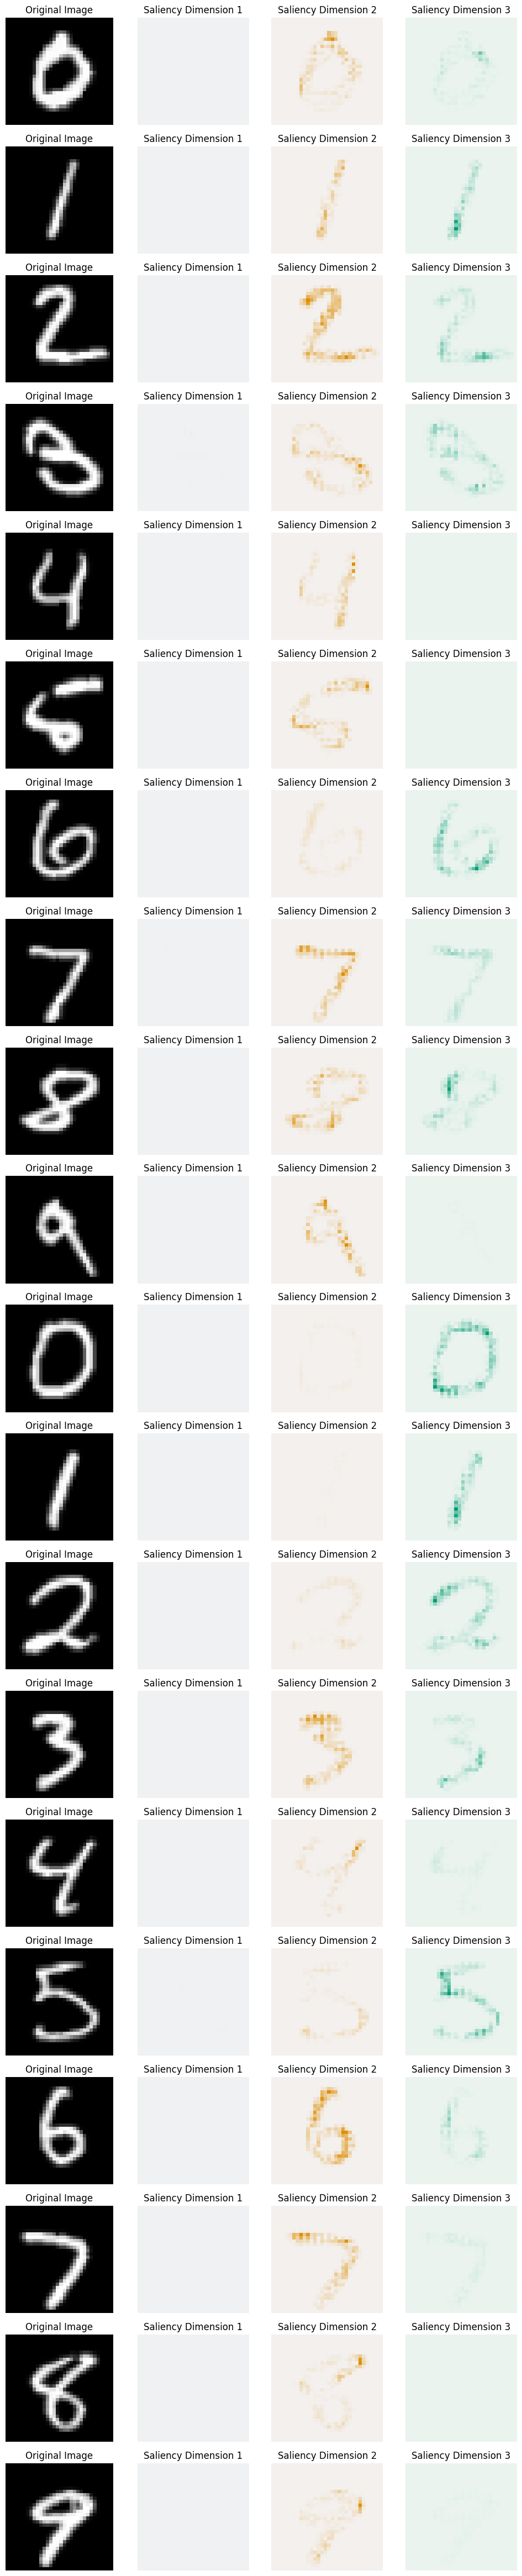

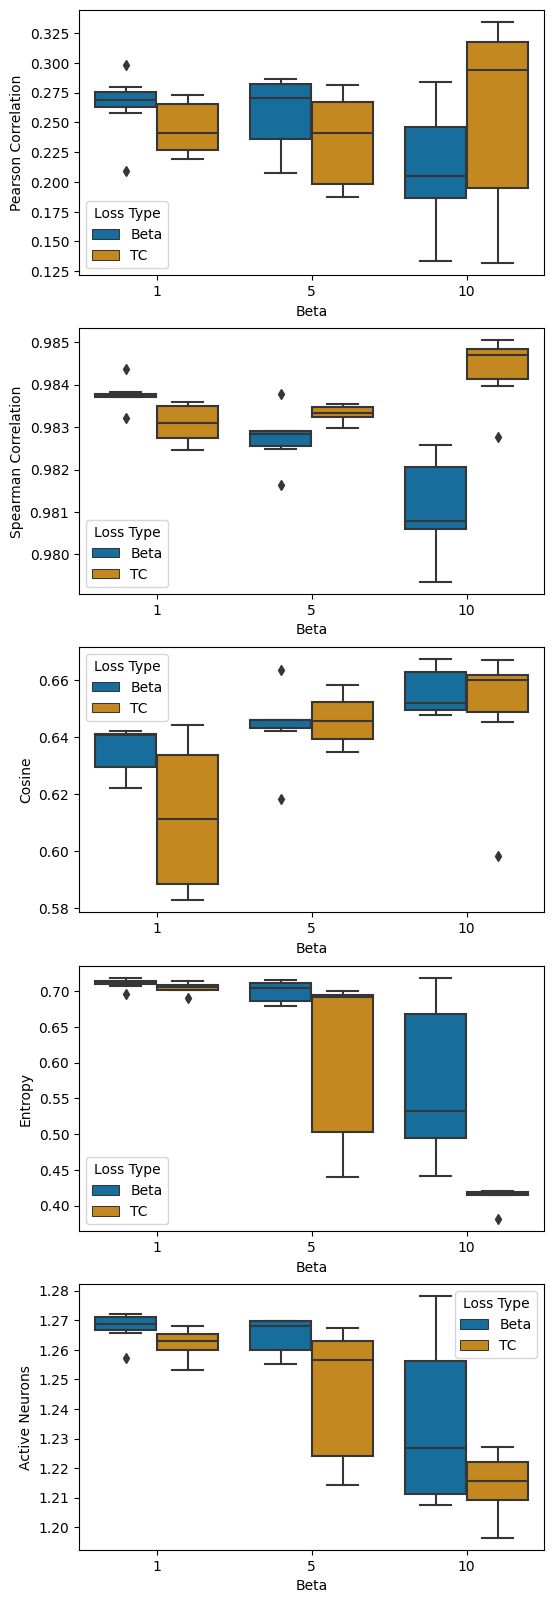

In [17]:
# If the method takes a lot of time you can reduce the number of runs (i.e., n_runs)
# but keep in mind that the results of the final box plot could deviate from our results
# and not be that representative
# Ideally use n_runs=5
mnist.disvae_feature_importance(
    n_runs=n_runs, batch_size=batch_size, 
                        random_seed=random_seed,
                        reg_prior=None, # We do not use Attribution prior here
                        attr_method_name=attr_method_name,
                        load_models=load_models, 
                        load_metrics=load_metrics,
                        show_fig=True,
                        override_metrics=override_metrics
)

#### DSPRITES

In [5]:
# Define the Parameters for this experiment
n_runs=1         # How many times you want each epxeriment to be performed? 
batch_size=300      # Batch Size that can improve the speed if appropriate hardware is available
random_seed=1       # The seed for the beginning of the experiment
attr_method_name='GradientShap'     # Approach to use to compute the Feature Importances ('GradientShap' or 'IntegratedGradients')
load_models=True        # Load pretrained models from files? (True or False)
load_metrics=False       # Cchange it to True if you ONLY want to calculate the final box figure from the existing saved metrics 
override_metrics=False   # If there are existing metrics from previous experiments, they will be used with the new results generated.
                        # Make it False to add the new metrics to the previous metrics and show the overall data
                        # Make it True to add the new metrics to a new empty file and thus the box-plots will depend only on the new metrics

INFO:root:Using existing metrics to build figures.


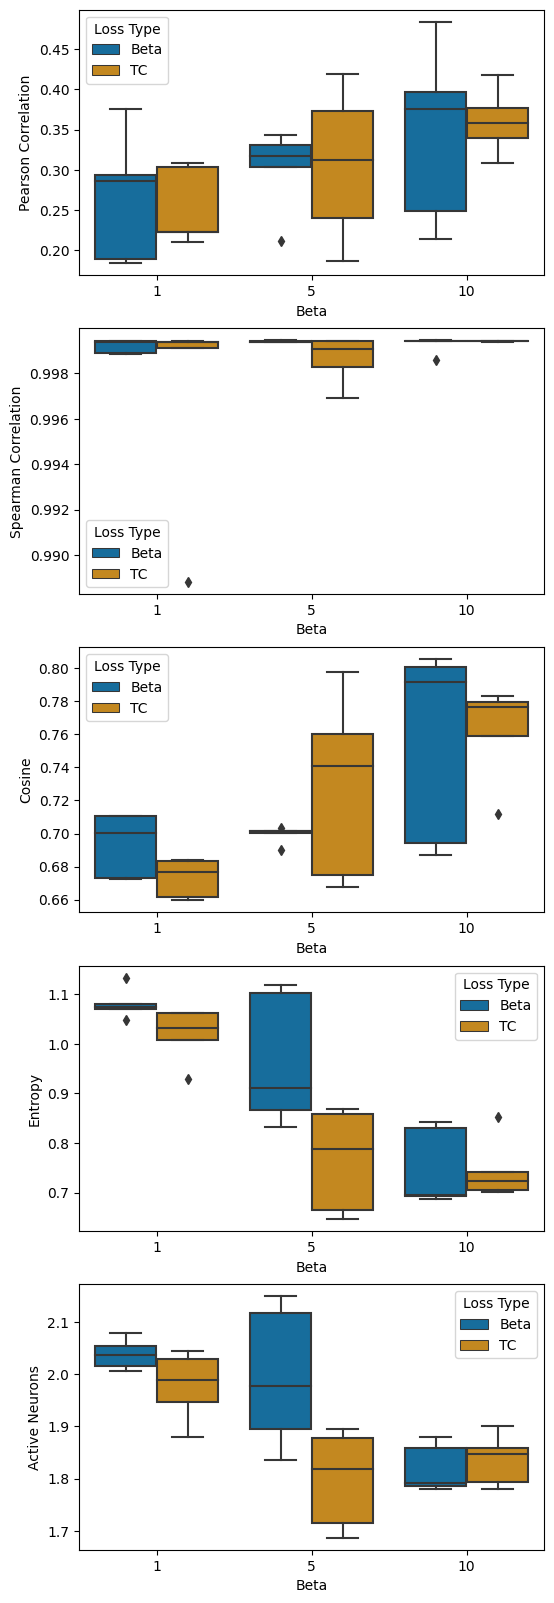

In [6]:
# If the method takes a lot of time you can reduce the number of runs (i.e., n_runs)
# but keep in mind that the results of the final box plot could deviate from our results
# and not be that representative
# Ideally use n_runs=5
dsprites.disvae_feature_importance(
    n_runs=n_runs, batch_size=batch_size, 
                        random_seed=random_seed,
                        reg_prior=None, # We do not use Attribution prior here
                        attr_method_name=attr_method_name,
                        load_models=load_models, 
                        load_metrics=load_metrics,
                        show_fig=True,
                        override_metrics=override_metrics
)

### Results 4:  Use Case: Comparing the Representations Learned with Different Pretext Tasks (Evaluating Claim 4)

#### MNIST

In [14]:
# Define the Parameters for this experiment
n_runs=1         # How many times you want each epxeriment to be performed? 
batch_size=300      # Batch Size that can improve the speed if appropriate hardware is available
random_seed=1       # The seed for the beginning of the experiment
load_models=True        # Load pretrained models from files? (True or False)

INFO:root:Working on Reconstruction-ae_run0
INFO:root:Loading the pretrained model from: c:\Users\valen\OneDrive - UvA\Repositories\FACT-AI-2023\test\Label-Free-XAI\experiments\results\mnist\pretext\Reconstruction-ae_run0.pt
INFO:root:Computing feature importance
INFO:root:Computing example importance


INFO:root:Working on Denoising-ae_run0
INFO:root:Loading the pretrained model from: c:\Users\valen\OneDrive - UvA\Repositories\FACT-AI-2023\test\Label-Free-XAI\experiments\results\mnist\pretext\Denoising-ae_run0.pt
INFO:root:Computing feature importance


INFO:root:Computing example importance


INFO:root:Working on Inpainting-ae_run0
INFO:root:Loading the pretrained model from: c:\Users\valen\OneDrive - UvA\Repositories\FACT-AI-2023\test\Label-Free-XAI\experiments\results\mnist\pretext\Inpainting-ae_run0.pt
INFO:root:Computing feature importance


INFO:root:Computing example importance


INFO:root:Working on Classifier_run0
INFO:root:Loading the pretrained model from: c:\Users\valen\OneDrive - UvA\Repositories\FACT-AI-2023\test\Label-Free-XAI\experiments\results\mnist\pretext\Classifier_run0.pt
INFO:root:Computing feature importance


INFO:root:Computing example importance


INFO:root:Run 0 complete 
 Feature Pearson 
 [[1.   0.37 0.32 0.44]
 [0.37 1.   0.27 0.37]
 [0.32 0.27 1.   0.31]
 [0.44 0.37 0.31 1.  ]]
 Feature Spearman 
 [[1.   0.99 0.99 0.99]
 [0.99 1.   0.99 0.99]
 [0.99 0.99 1.   0.99]
 [0.99 0.99 0.99 1.  ]]
 Example Pearson 
 [[1.   0.05 0.06 0.04]
 [0.05 1.   0.3  0.16]
 [0.06 0.3  1.   0.13]
 [0.04 0.16 0.13 1.  ]]
 Example Spearman 
 [[1.   0.47 0.61 0.27]
 [0.47 1.   0.63 0.38]
 [0.61 0.63 1.   0.29]
 [0.27 0.38 0.29 1.  ]]


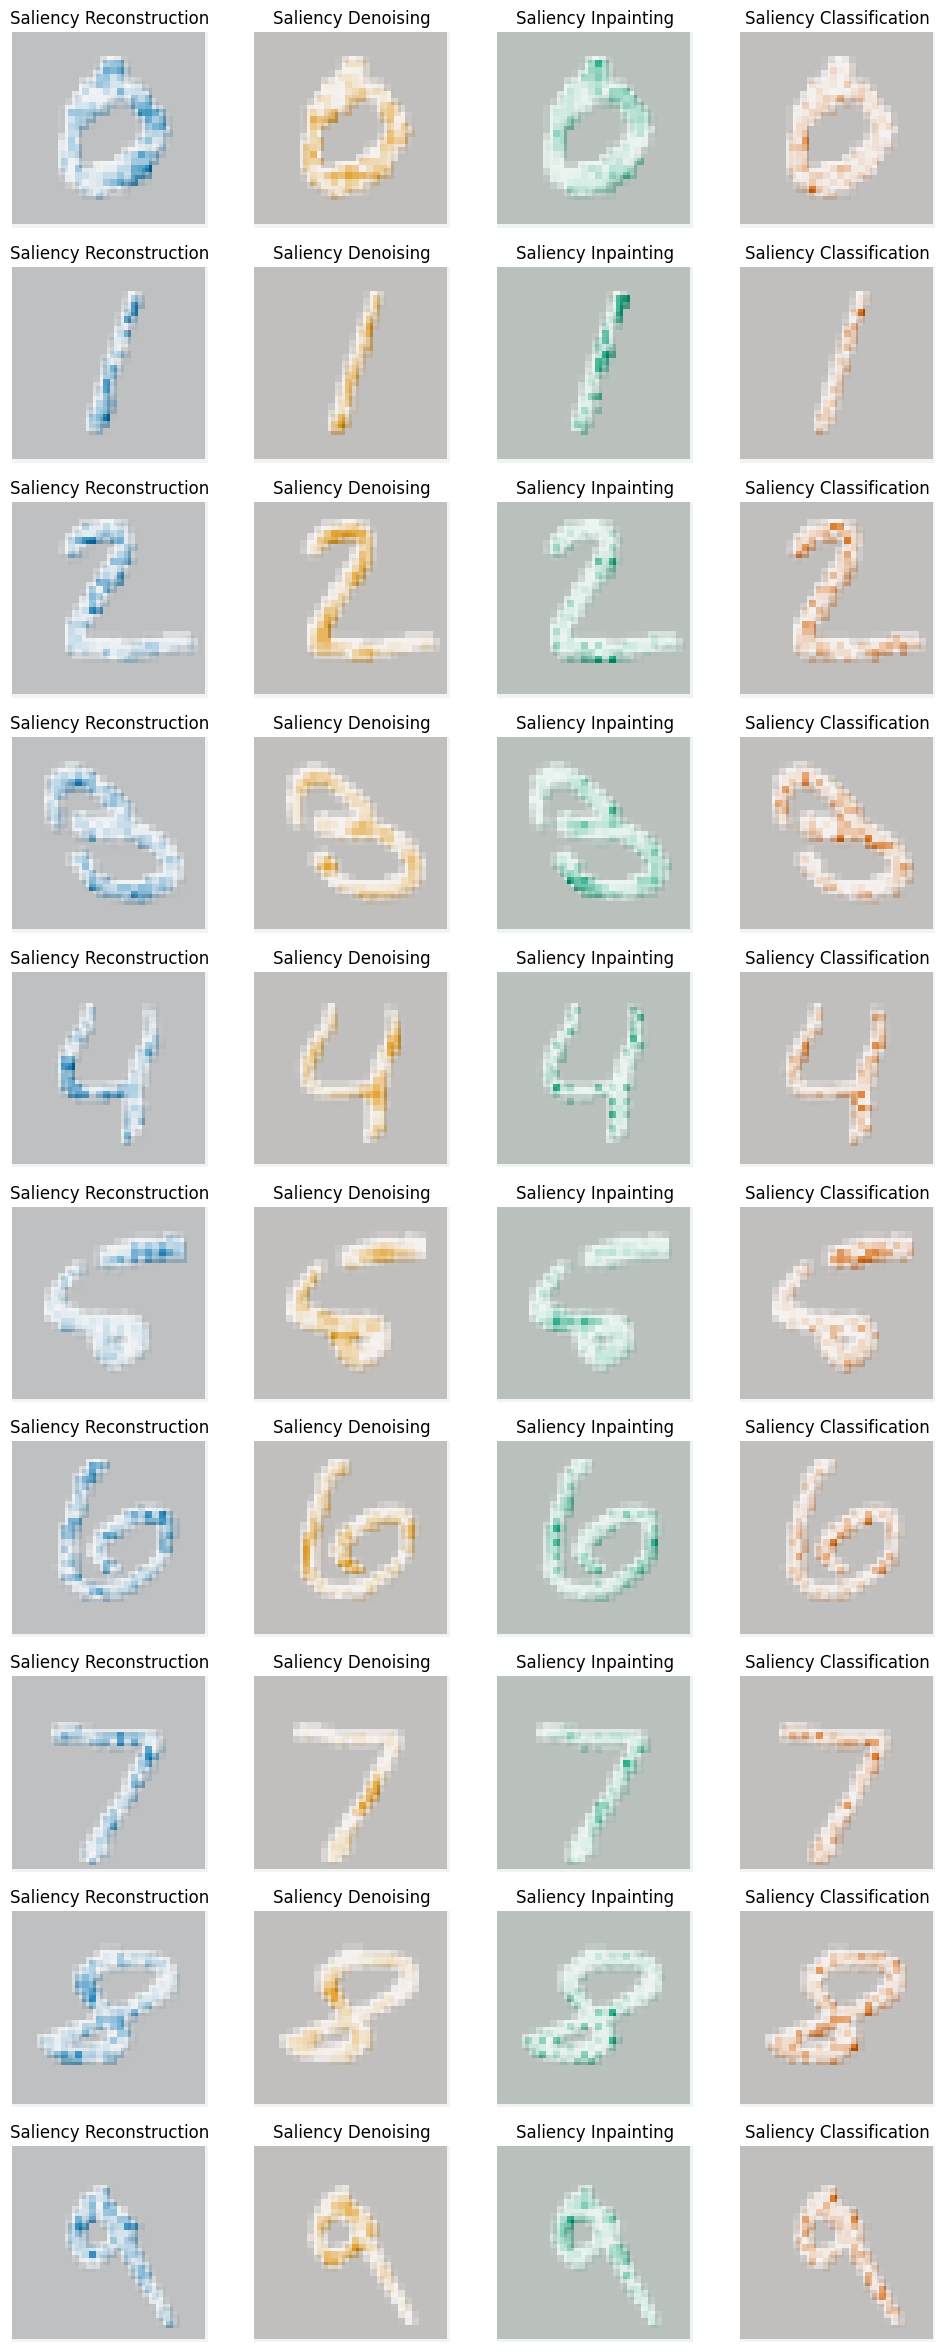

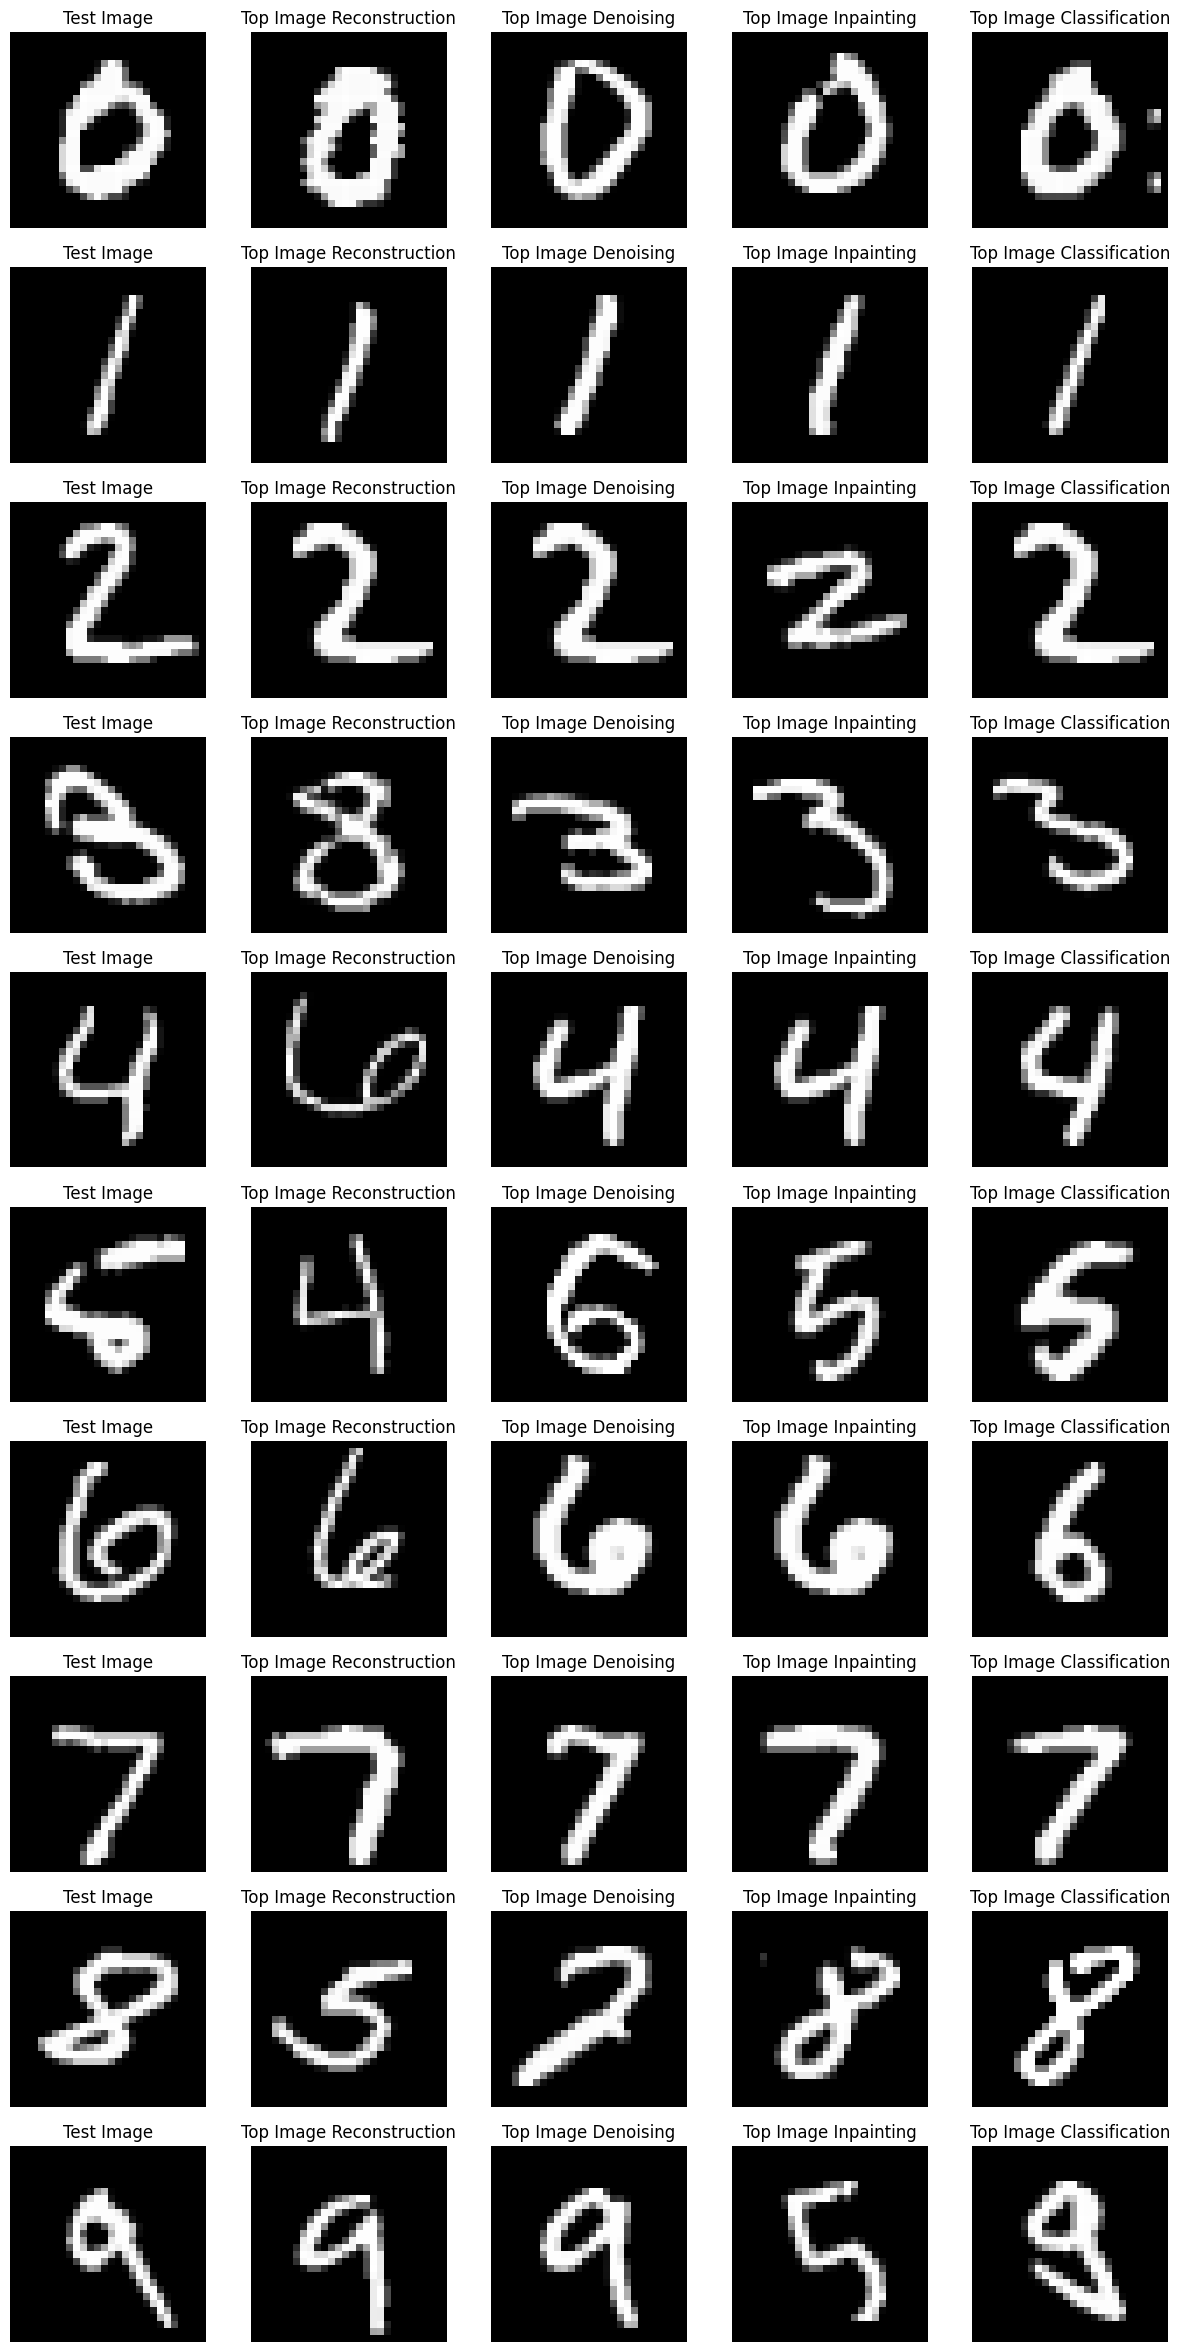

In [15]:
# If the method takes a lot of time you can reduce the number of runs (i.e., n_runs)
# but keep in mind that the results of the final box plot could deviate from our results
# and not be that representative
# Ideally use n_runs=5
mnist.pretext_task_sensitivity(
    n_runs=n_runs, 
    batch_size=batch_size, 
    random_seed=random_seed, 
    load_models=load_models,
    show_fig=True
)

## Reproducibility Study: Additional Experiments

### Extending applications of Label-Free Feature Importance (Generalizing Claim 1)

#### Tiny Imagenet (Image dataset)

In [14]:
# Define the Parameters for this experiment
random_seed=1       # The seed for the beginning of the experiment
n_epochs=100        # number of epochs to train
load_models=True        # Load pretrained models from files? (True or False)
load_metrics=True    # Change it to True if you ONLY want to calculate the final box figure from the existing saved metrics

INFO:root:Running for 200 classes.
Archive already downloaded and verified
Numpy files not found or corrupted. Constructing...
Parsing train data...


  0%|                                                                                 | 0/500 [00:00<?, ?it/s]


  0%|                                                                                 | 0/500 [00:00<?, ?it/s]


 82%|████████████████████████████████████████████████████████▎            | 408/500 [00:00<00:00, 4074.46it/s]


 81%|████████████████████████████████████████████████████████             | 406/500 [00:00<00:00, 4057.44it/s]


 outer: 100%|███████████████████████████████████████████████████████████████| 200/200 [00:30<00:00,  6.56it/s]


Archive already downloaded and verified
Numpy files not found or corrupted. Constructing...
Parsing test data...


 outer: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.34s/it]


INFO:root:Loading the metrics from: /Users/madhurapawar/Documents/FACT_1_Feb/FACT-AI-group-9/experiments/results/imagenet/consistency_features200_classes/metrics.csv


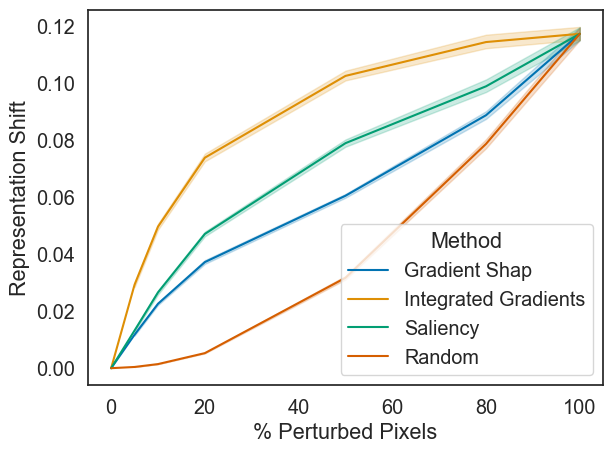

In [15]:
# Takes around 15 to 30 mins (on a pretrained model)
imagenet.consistency_feature_importance(
    random_seed=random_seed,
    n_epochs=n_epochs,
    load_models=load_models,
    load_metrics=load_metrics,
    )

#### Cora (Graph dataset)

In [6]:
random_seed = 1
n_epochs = 100

/Users/madhurapawar/opt/anaconda3/envs/fact_9/lib/python3.8/site-packages/scipy/sparse/_construct.py:615: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  blocks = np.asarray(blocks, dtype='object')


Epoch: 0001 train_loss= 0.79207 val_ap= 0.70500
Epoch: 0002 train_loss= 0.78995 val_ap= 0.73054
Epoch: 0003 train_loss= 0.78780 val_ap= 0.74849
Epoch: 0004 train_loss= 0.78115 val_ap= 0.77405
Epoch: 0005 train_loss= 0.77824 val_ap= 0.80095
Epoch: 0006 train_loss= 0.77060 val_ap= 0.82733
Epoch: 0007 train_loss= 0.75701 val_ap= 0.84534
Epoch: 0008 train_loss= 0.74440 val_ap= 0.84393
Epoch: 0009 train_loss= 0.73059 val_ap= 0.84532
Epoch: 0010 train_loss= 0.72201 val_ap= 0.84036
Epoch: 0011 train_loss= 0.71740 val_ap= 0.83362
Epoch: 0012 train_loss= 0.71421 val_ap= 0.82933
Epoch: 0013 train_loss= 0.71350 val_ap= 0.82923
Epoch: 0014 train_loss= 0.71253 val_ap= 0.82934
Epoch: 0015 train_loss= 0.71239 val_ap= 0.83022
Epoch: 0016 train_loss= 0.71186 val_ap= 0.83154
Epoch: 0017 train_loss= 0.71128 val_ap= 0.83730
Epoch: 0018 train_loss= 0.71044 val_ap= 0.84209
Epoch: 0019 train_loss= 0.70919 val_ap= 0.84602
Epoch: 0020 train_loss= 0.70732 val_ap= 0.84946
Epoch: 0021 train_loss= 0.70574 val_ap= 

/Users/madhurapawar/opt/anaconda3/envs/fact_9/lib/python3.8/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


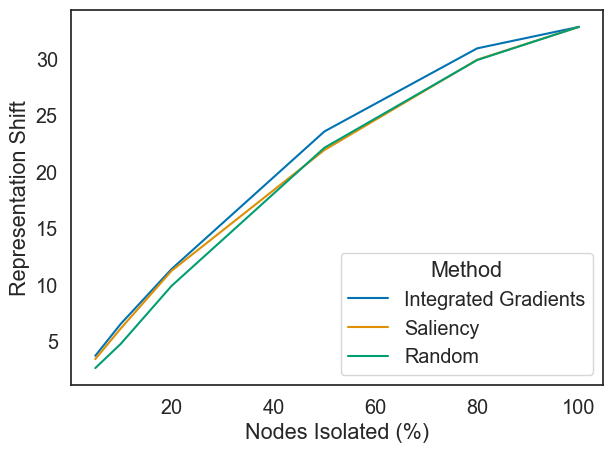

In [7]:
# Takes around 1 min due to small model size and lesser attribution methods used.
cora.consistency_feature_importance(
     random_seed=random_seed,
    n_epochs=n_epochs,
) 

### Extending applications of Label-Free Example Importance (Generalizing Claim 2)

#### Tiny Imagenet (Image dataset)

In [ ]:
# Define the Parameters for this experiment
batch_size=300      # Batch Size that can improve the speed if appropriate hardware is available
random_seed=1       # The seed for the beginning of the experiment
dim_latent=16        # Latent dimension size for autoencoder architecture
n_epochs=100        # number of epochs to train
subtrain_size=1000  # subset size of training data for attribution methods
subset_class=200    # can choose the number of classes to train and test from tiny imagenet (max. 200)
load_models=True        # Load pretrained models from files? (True or False)
load_metrics=True       # Change it to True if you ONLY want to calculate the final box figure from the existing saved metrics

Archive already downloaded and verified
Numpy files not found or corrupted. Constructing...
Parsing train data...


 outer: 100%|██████████| 200/200 [00:38<00:00,  5.22it/s]


Archive already downloaded and verified
Numpy files not found or corrupted. Constructing...
Parsing test data...


 outer: 100%|██████████| 1/1 [00:03<00:00,  3.66s/it]


INFO:root:Loading the metrics from: /home/avik/Labs/FACT/original1/FACT-AI-group-9/experiments/results/imagenet/consistency_examples/metrics.csv


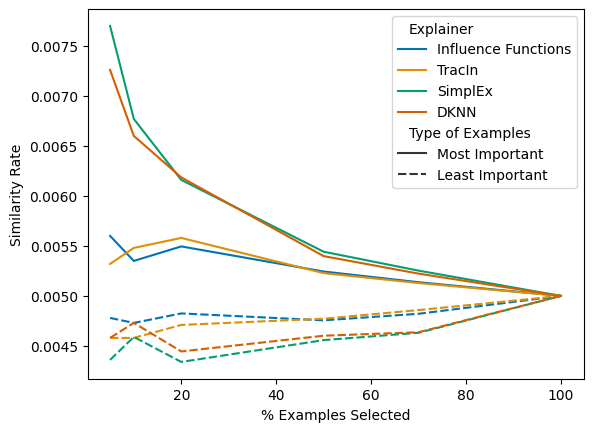

In [ ]:
imagenet.consistency_examples(
    batch_size=batch_size, 
    random_seed=random_seed,
    dim_latent=dim_latent,
    n_epochs=n_epochs,
    subtrain_size=subtrain_size,
    subset_class=subset_class,
    load_models=load_models,
    load_metrics=load_metrics,
    )

#### AGNews (Text dataset)

In [ ]:
# Adding the import statement so that agnews.consistency_example_importance has context of the module
from lfxai.utils.datasets import AG_NEWS_Tensors

In [ ]:
# Define the Parameters for this experiment
batch_size=1      # Batch Size needs to be kept 1 for this model for sequential rnn input
random_seed=1       # The seed for the beginning of the experiment
dim_latent=128        # Latent dimension size for autoencoder architecture
n_epochs=8        # number of epochs to train
subtrain_size=200  # subset size of training data for attribution methods
load_models=True        # Load pretrained models from files? (True or False)
use_saved_dataset=True  # Use the same subset of dataset used to train the model
load_metrics=True       # Change it to True if you ONLY want to calculate the final box figure from the existing saved metrics

In [ ]:
agnews.consistency_example_importance(
    batch_size=batch_size, 
    random_seed=random_seed,
    dim_latent=dim_latent,
    n_epochs=n_epochs,
    subtrain_size=subtrain_size,
    load_models=load_models,
    use_saved_dataset=use_saved_dataset,
    load_metrics=load_metrics,
    )

INFO:root:Loading the metrics from: /home/avik/Labs/FACT/original1/FACT-AI-group-9/experiments/results/agnews/consistency_examples/metrics.csv


### Challenging our Assumptions with Disentangled VAEs and prior attributions (Generalizing Claim 3)

#### MNIST

In [9]:
# Define the Parameters for this experiment
n_runs=1         # How many times you want each epxeriment to be performed? 
batch_size=300      # Batch Size that can improve the speed if appropriate hardware is available
random_seed=1       # The seed for the beginning of the experiment
reg_prior=0.001     # Change the lambda if you want to try it with more lambdas
attr_method_name='GradientShap'     # Approach to use to compute the Feature Importances ('GradientShap' or 'IntegratedGradients')
load_models=True        # Load pretrained models from files? (True or False)
load_metrics=False       # Cchange it to True if you ONLY want to calculate the final box figure from the existing saved metrics
override_metrics=False   # If there are existing metrics from previous experiments, they will be used with the new results generated.
                        # Make it False to add the new metrics to the previous metrics and show the overall data
                        # Make it True to add the new metrics to a new empty file and thus the box-plots will depend only on the new metrics

In [10]:
# Here we use Pixel Attribution Prior with a regularization parameter as specified above,
# in the variable reg_prior, which by default is 0.001 

# If the method takes a lot of time you can reduce the number of runs (i.e., n_runs)
# but keep in mind that the results of the final box plot could deviate from our results
# and not be that representative
# Ideally use n_runs=5
mnist.disvae_feature_importance(
    n_runs=n_runs, batch_size=batch_size, 
                        random_seed=random_seed,
                        reg_prior=reg_prior,        # Here we use Attribution Prior
                        attr_method_name=attr_method_name,
                        load_models=load_models, 
                        load_metrics=load_metrics,
                        show_fig=True,
                        override_metrics=override_metrics
)

INFO:root:Using existing metrics to build figures.
